In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from musicautobot.imports import *
from musicautobot.numpy_encode import *
from musicautobot.utils.file_processing import process_all, process_file
from musicautobot.config import *
from musicautobot.music_transformer.all import *

In [3]:
from fastai.basics import *
from fastai.text.models import TransformerXL

In [4]:
base_path = Path('../../data')
midi_path = base_path/'midi/examples'
data_path = base_path/'numpy'
data_save_name = 'musicitem_data_save.pkl'

In [6]:
midi_files = get_files(midi_path, '.mid', recurse=True)
data = MusicDataBunch.from_files(midi_files, data_path, processors=[Midi2ItemProcessor()], bs=4, bptt=128, encode_position=False)

learn = music_model_learner(data, arch=TransformerXL, config=default_config())

/home/ashaw/anaconda3/envs/musicautobot_v1/lib/python3.8/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [7]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,3.821262,3.263968,0.326172,00:04
1,3.160541,2.639279,0.436523,00:03
2,2.829583,2.433244,0.434570,00:03
3,2.637892,2.346933,0.453125,00:03


## 5. Predict

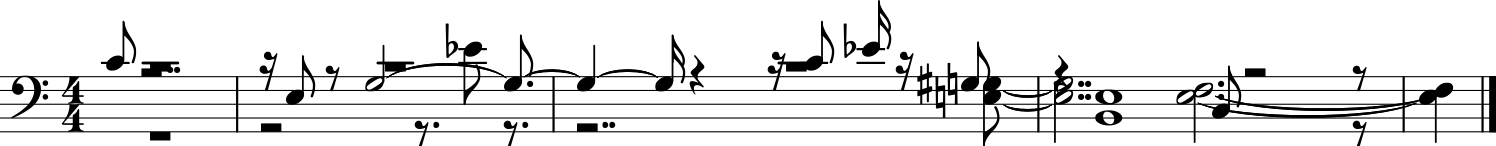

In [12]:
midi_file = midi_path/'../notebook_examples/single_bar_example.mid'
item = MusicItem.from_file(midi_file, data.vocab);
pred, full = learn.predict(item, n_words=100)
pred.show()

In [13]:
pred


MusicItem - (87,)
n60 d2 xxsep d2 xxsep d2 xxsep d2 xxsep d2...

In [14]:
pred.play()